In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

In [135]:
def is_in_subspace(vector,matrix):
    coeff=vector.dot(matrix)
    vector_hat=np.zeros(ns.shape[0])

    for i in range(matrix.shape[1]):
        vector_hat+=coeff[i]*matrix[:,i]
    
    error=np.sum(np.abs(vector-vector_hat))
    
    return error, vector_hat

## Two cliques no hole

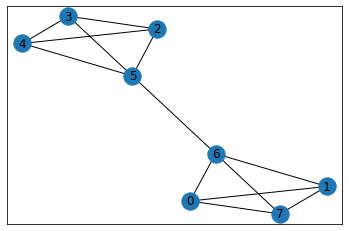

In [6]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=0)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=1)

# G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

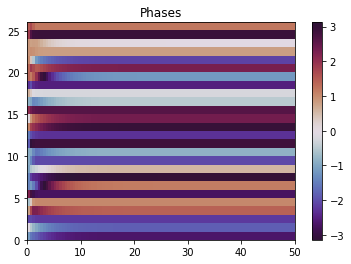

In [7]:
# np.random.seed(4444)
initial_phase = np.random.uniform(0, 2*np.pi, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

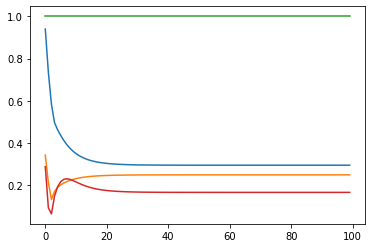

In [8]:
op=module_order_parameter(edge_result.y,edge_community_assignment)
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
# plt.legend(['0','1','2'])
plt.show

## Two cliques one hole

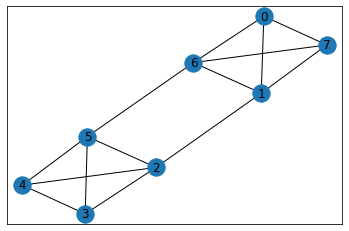

In [146]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=2)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=2)

G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

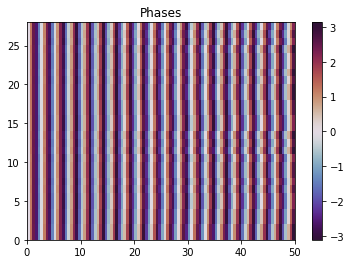

In [162]:
# np.random.seed(4444)
initial_phase = np.random.uniform(0, 0, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*10
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

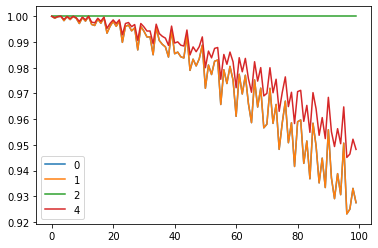

In [163]:
op=module_order_parameter(edge_result.y,edge_community_assignment)
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','1','2','4'])
plt.show

## No hole square

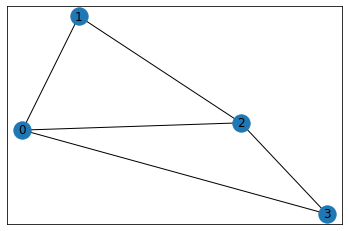

In [41]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)
G.add_edge(0,2,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

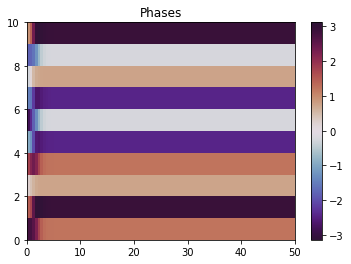

In [16]:
initial_phase = np.random.uniform(0, 2*np.pi, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

## One hole square

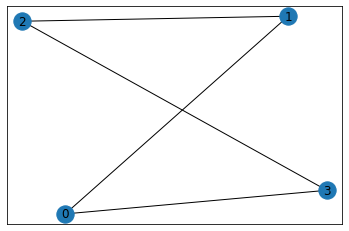

In [112]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

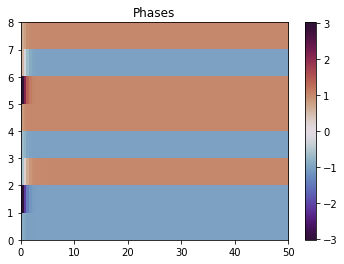

In [121]:
initial_phase = np.random.uniform(0, np.pi, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

[ 4.00000000e+00 -2.22044605e-16  2.00000000e+00  2.00000000e+00]


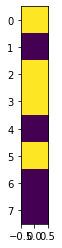

[ 4.00000000e+00 -1.43131458e-16 -1.43131458e-16  2.00000000e+00
  2.00000000e+00  2.45553755e-16 -1.23319933e-16 -1.23319933e-16]


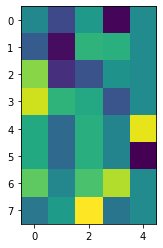

In [122]:
print(np.linalg.eigvals(Gsc.L1.todense()))

plt.figure()
plt.imshow(Gsc.V.dot(sc.linalg.null_space(Gsc.L1.todense())))
plt.show()

print(np.real(np.linalg.eigvals(Gsc.lifted_L1.todense())))

plt.figure()
plt.imshow(np.real(sc.linalg.null_space(Gsc.lifted_L1.todense())))
plt.title('')
plt.show()

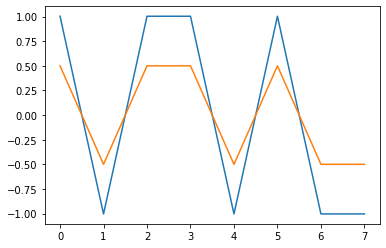

In [123]:
plt.figure()
plt.plot(edge_result.y[:,-1])
plt.plot(Gsc.V.dot(sc.linalg.null_space(Gsc.L1.todense())))
plt.show()

9.00648444712715e-11


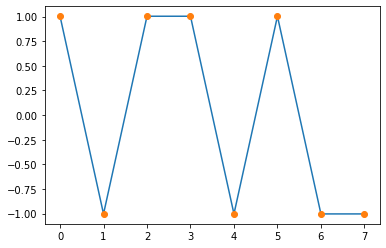

In [138]:
error,theta_hat=is_in_subspace(edge_result.y[:,-1],sc.linalg.null_space(Gsc.lifted_L1.todense()))
print(error)
plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
plt.show()

In [139]:
print(edge_result.y[:,-1].dot(sc.linalg.null_space(Gsc.lifted_L1.todense())))

[ 1.1465297  -0.0617668  -1.41777777 -1.64785277 -1.41937287]
